# BIOMEDIN 260/RAD260: Problem Set 2 - Digital Image Processing

## Spring 2021

## Group Members

**Person 1:**

Trey Turner

**Person 2:**

YOUR NAME HERE

Welcome to Problem Set 2!

In this problem set, we will be exploring some fundamental concepts in digital image processing. We will be also be doing some math! Luckily, iPython notebooks have the additional ability of interpreting LaTeX ($\LaTeX$) for typesetting mathematical expressions. For example:

$$ f(t)*g(t) = \int_{-\infty}^{\infty} f(\tau)g(t-\tau)d\tau $$

This says that a convolution is defined as the integral of the product of the two functions after one is reversed and shifted. Note the word reversed, as in the kernel is mirrored along both axes. Here's another example:

$$y(x) = \frac{\sum_{i=2}^{i=3} x^i}{M}$$

This says nothing meaningful. ¯\\_(ツ)_/¯

If you are not familiar with $\LaTeX$, don't worry! You can learn it very quickly just by doing this assignment. If you are looking for more practice, try some of [these](http://www.personal.ceu.hu/tex/cookbook.html) examples out.

## Problem 1: Linear Filtering (50 points) 

**a.** Image matrix $A$ consists of a small diamond surrounded by a layer of zeros. Compute the 2D convolution between image matrix $A$ and filter kernel $B$. The output image will be the same shape as the input image, so you can assume a single zero padding layer on each side of the image.

We have given you the image matrix $A$ and the filter kernel $B$ in the cell below. First, do this 2D convolution by hand (good midterm practice!). Then, check your answer in the cell below that. *Hint: you may find a particular function in the `scipy.signal` package helpful for this task.*

In [1]:
import numpy as np
import scipy.signal as sp
import scipy.ndimage as ndimage

matA = np.array([[0., 0., 0., 0., 0.],
                 [0., 0., 1., 0., 0.],
                 [0., 1., 0., 1., 0.],
                 [0., 0., 1., 0., 0.],
                 [0., 0., 0., 0., 0.]])

kerB = np.array([
                 [1., 1., 1.],
                 [1., 1., 1.],
                 [1., 1., 1.],
                ])

In [2]:
### WRITE CODE IN HERE. You can have up to 2 cells for this question, but only one is required #######
out = np.zeros((len(matA), len(matA[0])))

for i in range(len(matA)):
    for j in range(len(matA[0])):
        rows = [i]
        cols = [j]
        if i: 
            rows.append(i-1)
        if j:
            cols.append(j-1)
        if (i - len(matA) + 1) < 0:
            rows.append(i+1)
        if (j - len(matA[0]) + 1) < 0:
            cols.append(j+1)
        for row in rows:
            for col in cols:
                out[i][j] += matA[row][col]
        
print(out)
######################################################################################################

[[0. 1. 1. 1. 0.]
 [1. 2. 3. 2. 1.]
 [1. 3. 4. 3. 1.]
 [1. 2. 3. 2. 1.]
 [0. 1. 1. 1. 0.]]


In [3]:
ans = sp.convolve(matA, kerB, mode='same')
print(ans)

[[0. 1. 1. 1. 0.]
 [1. 2. 3. 2. 1.]
 [1. 3. 4. 3. 1.]
 [1. 2. 3. 2. 1.]
 [0. 1. 1. 1. 0.]]


**b.** How does the output matrix compare to the original image matrix $A$? What type of filter is kernel $B$ acting as? Alternatively, if you divide the output image by np.sum(kerB), what have you essentially done to the image?

**Answer:** The output matrix is the same size but the values of the pixels have seemingly grown and bled into neighboring pixel values. Kernel $B$, as we implemented it, is acting as a mean filter but without normalizing the resulting pixel values, thus if we divide the output image by np.sum(kerB) we will complete the mean filter by normalizing the results.

**c.** Let matrix $O$ be the output from the 2D convolution between image matrix $C$ and kernel $D$. Compute $O$. 

The same way that we write out $C$ and $D$ for you, write out the output for us as a NumPy array, as in output the matrix $O$. You may choose to write out the full convolution (by zero-padding image matrix $C$ and then convolving with kernel $D$) or simply crop the output matrix to be the same size as the input matrix. Try this by hand first for some more midterm practice.

In [4]:
# Create image matrix C.
C = np.zeros((5, 5))
C[:,[1,3]] = 1

C

array([[0., 1., 0., 1., 0.],
       [0., 1., 0., 1., 0.],
       [0., 1., 0., 1., 0.],
       [0., 1., 0., 1., 0.],
       [0., 1., 0., 1., 0.]])

In [5]:
# Create filter kernel D.
D = np.array([-1, 0, 1])
D = np.expand_dims(D, 0)

D

array([[-1,  0,  1]])

In [6]:
## WRITE MATRIX O IN HERE ######
C2 = np.pad(C, (1, 1), 'constant', constant_values=(0,0))
O2 = sp.convolve(C2, D, mode='same')

O = sp.convolve(C, D, mode='same')
################################

O
#O2

array([[-1.,  0.,  0.,  0.,  1.],
       [-1.,  0.,  0.,  0.,  1.],
       [-1.,  0.,  0.,  0.,  1.],
       [-1.,  0.,  0.,  0.,  1.],
       [-1.,  0.,  0.,  0.,  1.]])

**d.** How does the output matrix $O$ compare to the original image matrix $C$? In other words, what kind of a filter is kernel $D$?

**Answer:** Kernel $D$ is an edge detection filter. However, edge detection filters work by approximating gradients and since kernel $D$ is a 1 x 3 matrix it is only finding gradients along the horizontal axis.

**e.** Convolve image matrix $C$ with kernel $E$ to get matrix $F$. How does $F$ differ from $E$? Again, try this by hand first for some more midterm practice.

In [7]:
# Create filter kernel E.
E = D.T

E

array([[-1],
       [ 0],
       [ 1]])

In [8]:
# Convolve C and E to make F.#
F = sp.convolve(C, E, mode='same')

##############################

F

array([[ 0., -1.,  0., -1.,  0.],
       [ 0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  1.,  0.]])

**Answer:** Just as with kernel $D$, kernel $E$ is an edge detection filter but this time searching along the vertical axis instead of the horizontal axis. Thus kernels $D$ and $E$ are complementary in their ability to perform edge detection since they are approximating gradients with respect to orthogonal axes.

**f.** Import your favorite image as a NumPy array. Try to keep it reasonably sized (like 256-by-256) to avoid overly long computation times. If you don’t have a favorite image, you can create a matrix of zeros and ones to form shapes (like a disk or rectangle).

Apply some additive white Gaussian noise to your image. There are many ways to do this, and you should choose your favorite method! Next, try to smooth out your noisy image using your favorite linear smoothing filter.

Show all three images (the original image, the noisy image, and the smoothed noisy image) side-by-side using `plt.subplots()`.

Play around with the level of noise as well as the smoothing filter parameters. At what level of noise can you no longer distinguish the main features of the original image? 

As the level of noise increases, how should you adjust your smoothing filter parameters? What is the main downside to smoothing images?


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[ 1.14292992 -0.21582176  0.56552996  0.04914614]
(3, 3, 4) (256, 256, 4)


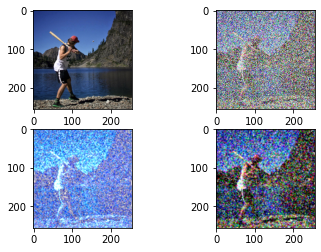

<Figure size 720x240 with 0 Axes>

In [9]:
### DISPLAY IMAGES HERE. #############################################################################
from matplotlib import image
from matplotlib import pyplot as plt
from numpy import random

fig, ax = plt.subplots(2, 2)

image = image.imread('mypic.png')
noisy_image = np.array([[[x + random.normal(0, 0.7) for x in row] for row in layer] for layer in image])
print(noisy_image[0][0])

kernel_dim = 3
num_cells = kernel_dim ** 2 *2
kernel_layer = np.array([[1.0/num_cells, 1.0/num_cells, 1.0/num_cells, 1.0/num_cells],
            [1.0/num_cells, 1.0/num_cells, 1.0/num_cells, 1.0/num_cells],
            [1.0/num_cells, 1.0/num_cells, 1.0/num_cells, 1.0/num_cells]])
my_kernel = np.array([kernel_layer, kernel_layer, kernel_layer])
print(my_kernel.shape, noisy_image.shape)

my_smoothed_image = sp.convolve(noisy_image, my_kernel, mode='same')
smoothed_image = ndimage.gaussian_filter(noisy_image, sigma=(1,1,0))
#twice_smoothed = sp.convolve(smoothed_image, my_kernel, mode='same')

ax[0][0].imshow(image)
ax[0][1].imshow(noisy_image)
ax[1][0].imshow(my_smoothed_image)
ax[1][1].imshow(smoothed_image)
plt.figure(figsize=(9, 3), dpi=80)
plt.show()

######################################################################################################

**Answer:** Giving the noise distribution a standard deviation of 1 renders most of the original features unidentifiable. As the amount of noise increases one should accordingly increase the size of the kernel so as to minimize the impact of the individual pixel noise on our output image. However, more aggressive smoothing such as by increasing the kernel size further blurs the original contents of the image.

**g.** Try applying a linear edge detection kernel (such as a central finite difference kernel or Sobel operator) to both your original image and the noisy image. How does it do?

In [10]:
def gaussian_kernel(size, sigma=1):
    size = int(size) // 2
    x, y = np.mgrid[-size:size+1, -size:size+1]
    normal = 1 / (2.0 * np.pi * sigma**2)
    g =  np.exp(-((x**2 + y**2) / (2.0*sigma**2))) * normal
    return g

In [11]:
def sobel_edge_kernel(img):
    x_kernel = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
    y_kernel = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]])
    Ix = ndimage.filters.convolve(img, x_kernel)
    Iy = ndimage.filters.convolve(img, y_kernel)
    
    G = np.hypot(Ix, Iy)
    G = G / G.max() * 255
    theta = np.arctan2(Iy, Ix)
    return G, theta

In [12]:
def convert_image(img):
    img = img.convert('1')      # Convert to black&white 
    A = np.array(img)             
    new_A = np.empty((A.shape[0], A.shape[1]), None)

    for i in range(len(A)): 
        for j in range(len(A[i])): 
            if A[i][j] == True: 
                new_A[i][j] = 1 
            else: 
                new_A[i][j] = 0 
    return new_A

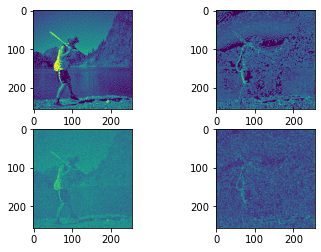

In [13]:
from PIL import Image
#image = np.asarray(Image.open('mypic.png')) 
image = Image.open('mypic.png')
image = convert_image(image) #convert from 3D matrix to 2D array

noisy_image = np.array([[x + random.normal(0, .25) for x in row] for row in image])
im_edges, theta1 = sobel_edge_kernel(image)
noisy_edges, theta2 = sobel_edge_kernel(noisy_image)

#print(theta1.shape, theta2.shape)

fig, ax = plt.subplots(2, 2)

ax[0][0].imshow(image)
ax[0][1].imshow(im_edges + theta1)
ax[1][0].imshow(noisy_image)
ax[1][1].imshow(noisy_edges + theta2)
plt.show()

**Answer:** The linear edge detection kernel really struggles with the nosy image (bottom row) compared to the original image. This makes sense given that the noisiness significantly muffles the signal of the original edges.

**h.** Assume we are working with an 1D input image $I(x)$ (though this could be easily generalized to 2D or 3D). Suppose we create a new type of filter defined as:

$$I'(x) = \frac{\sum_{i}I(x_i)f(x_i -x)}{\sum_{i}f(x_i -x)}$$


where $I'(x)$ is the output image, $f(x)$ is an zero-mean Gaussian function, and $i$ indexes over pixels that are close to $x$.

What kind of filter is this? For example, is it linear or non-linear? Is it a low-pass filter or a high-pass filter? (Hint: you may have seen a similar type of filter in this problem.)

**Answer:** This filter is a low-pass filter since it blurs the image by removing the high frequency components of the original image. Additionally, it is linear since the computation performed by the filter is a weighted mean operation.

**i.** How does this filter perform at edges and boundaries within the image? Why? Write an expression for a new filter that attempts to address this problem. Is your new filter still linear?


Hint: introduce a function $g(\ldots)$ into the above expression that encourages the preservation of edges. 

$$I'(x) = \frac{\sum_{i}I(x_i)f(x_i - x)g(\ldots)}{\sum_{i}f(x_i -x)g(\ldots)}$$

**Answer:** The filter from (h) performs poorly around the edges and boundaries because it averages pixel values to generate a new pixel values and thus darkens pixels near the boundary of a zero-padded image and blurs meaningful edges within an image because pixels on both sides of the edge get averaged together. This is a good thing if our input image is noisy but not if we want to preserve the sharpness of the original image. In order to improve the performance of this filter we can introduce another function, $g(x)$, which will act as a median filter so as to preserve edges, and have the output of our filter be an average between the low-pass filter from (h) and the median filter $g(x)$. Depending on the performance of this resulting filter, I think that an effective weighting strategy for the two filters would be to weight $g(x)$ heavily only when there is significant disagreement between the ouputs of the two filters so as to maximize the strengths of each filter type.

**j.** Linear smoothing filters are an efficient way to reduce the presence of noise in the image at the cost of lowering image resolution and blurring out edges. Several non-linear filters were developed to both reduce noise while attempting to preserve the high frequency edges in the image. Choose a non-linear de-noising filter and apply it to your noisy image from part *f*. How well does it do compared to the image that was de-noised using a linear smoothing filter?

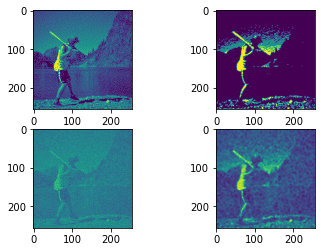

In [15]:
### WRITE CODE IN HERE. ##############################################################################
from PIL import Image
#image = np.asarray(Image.open('mypic.png')) 
image = Image.open('mypic.png')
image = convert_image(image)

noisy_image = np.array([[x + random.normal(0, .25) for x in row] for row in image])

#print(image.shape, edge_kernel.shape, image[100,50:100])

im_median = ndimage.median_filter(image, size=3)
noisy_median = ndimage.median_filter(noisy_image, size=5)

fig, ax = plt.subplots(2, 2)

ax[0][0].imshow(image)
ax[0][1].imshow(im_median)
ax[1][0].imshow(noisy_image)
ax[1][1].imshow(noisy_median)
plt.show()
######################################################################################################

**Answer:** This filter did a much better job with the noisy image! Using a median filter allowed the kernel to completely ignore noisy outliers in hopes of recovering more features from the original photo.

## Problem 2: Geometric Features (20 points)

As you may recall from class, the geometric features of a tumor can sometimes reveal significant information about whether it is benign or malignant. [Radiologists frequently assess the geometry of lesions in mammograms when attempting to diagnose breast cancer](https://www.sciencedirect.com/science/article/pii/S2211568413003872).

In this exercise, we will attempt to explore some quantitative methods of differentiating between certain lesion shapes.

Download the two mammograms from Canvas. `LEFT_CC_BENIGN.tif` depicts a cranial-caudal view (looking down on the breast from the patient's perspective) of the left breast. There is a benign lesion present in the mammogram. Can you locate it? 

If you are having difficulty locating the lesion, try seeing if you can spot it in the mask `LEFT_CC_BENIGN_MASK.tif`, which consists of a rough segmentation of the lesion. `RIGHT_CC_MALIGNANT.tif` and `RIGHT_CC_MALIGNANT_MASK.tif` are the mammogram and corresponding lesion segmentation of a different patient, but this mammogram depicts a breast with a **malignant** tumor.

**a.** Start by loading these two mammograms and their corresponding masks as image matrices. Plot them on a single figure (using a 2-by-2 grid of subplots). You should use reasonable **x** and **y** limits in your figures to get a reasonable depiction of your lesion segmentations.

Qualitatively describe the shape differences between the two lesions. What types of shapes and margins are indicative of malignant tumors?

<Figure size 1440x1440 with 0 Axes>

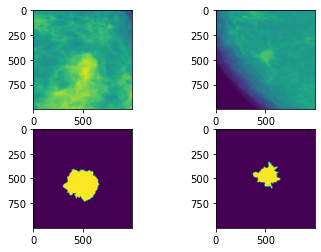

In [16]:
import pydicom as dcm
import matplotlib.pyplot as plt
from skimage.filters import threshold_otsu
%matplotlib inline

## Load mammograms showing benign and malignant tumors.
img_benign = plt.imread('LEFT_CC_BENIGN.tif')
mask_benign = plt.imread('LEFT_CC_BENIGN_MASK.tif')

img_malignant = plt.imread('RIGHT_CC_MALIGNANT.tif')
mask_malignant = plt.imread('RIGHT_CC_MALIGNANT_MASK.tif')

## Plotting code here.
fig = plt.figure(figsize=(20, 20))
fig, ax = plt.subplots(2, 2)

### WRITE CODE IN HERE. You can have up to 2 cells for this question, but only one is required #######
ax[0][0].imshow(img_benign[2000:3000,1000:2000])
ax[0][1].imshow(img_malignant[2800:3800,900:1900])
ax[1][0].imshow(mask_benign[2000:3000,1000:2000])
ax[1][1].imshow(mask_malignant[2800:3800,900:1900])
plt.show()


######################################################################################################

fig.tight_layout() # Fixes spacing between subplots.

**Answer:** Judging by the above images and a few examples from lecture, it seems that malignant tumors have a slightly less uniform, more jagged shape as compared to the more rounded benign tumors.

**b.** Next, try computing some basic geometric features of the two lesions. Which features are the most significant for differentiating between them? Is this what you expected? The `regionprops()` function in the `skimage` library will automatically compute several geometric features for you, but you might choose to code up some of your own. If you don't trust the provided segmentations, feel free to create your segmentation method or modify the provided ones to get a better estimate of the lesion shapes! Finally, it could be interesting to apply some edge-detection filters to the mammograms to better emphasize the margins. 

You can also test your approach on other mammograms from a [larger dataset (~20 GB)](https://www.dropbox.com/sh/y0k6wokrq5fibpa/AAC43nULYqhI_cLu555qy2nla?dl=0). You will need these mammograms for the next problem set, so there's no harm in downloading the images now!

**There is no single correct answer for this exercise, and you should definitely try several different approaches and explore!**

**Answer:** Given the conclusions drawn in (a), I started by looking for properties computed by $regionprops$ that I expected would reflect key geometric features like having a jagged or rounded shape. Two such values that seem to do a good job of relecting this quality are the 'extent' property which divides the area of the lesion by the area of the bounding box required to circumscribe the lesion, and 'perimeter' divided by 'area' (or vice versa). 

In [17]:
from skimage.measure import regionprops
from skimage.feature import texture

### WRITE CODE IN HERE. You can have up to 2 cells for this question, but only one is required #######
benign_img = img_benign[2000:3000,1000:2000]
benign_mask = mask_benign[2000:3000,1000:2000]
malignant_img = img_malignant[2800:3800,900:1900]
malignant_mask = mask_malignant[2800:3800,900:1900]

benign_props = regionprops(benign_mask, intensity_image=benign_img)
malignant_props = regionprops(malignant_mask, intensity_image=malignant_img)

print('area: (E=L)')
print(benign_props[0].area, malignant_props[0].area, '\n')

print('perimeter:')
print(benign_props[0].perimeter, malignant_props[0].perimeter, '\n')

print('perimeter / area: (E=R)')
print(benign_props[0].perimeter / benign_props[0].area * 100, malignant_props[0].perimeter / malignant_props[0].area * 100, '\n')

print('feret_diameter_max:')
print(benign_props[0].feret_diameter_max, malignant_props[0].feret_diameter_max, '\n')

print('extent (area / bounding box): (E=L)')
print(benign_props[0].extent, malignant_props[0].extent, '\n')
######################################################################################################

area: (E=L)
79149 35508 

perimeter:
1696.481456229631 1499.284450716211 

perimeter / area: (E=R)
2.1434022618474406 4.222384957520027 

feret_diameter_max:
371.2142238654117 284.76305940202286 

extent (area / bounding box): (E=L)
0.6443259524584826 0.4696266317501885 



## Problem 3: Textural Features (30 points)


**a.** Compute the gray level co-occurrence matrix (GLCM) of image matrix $A$ below using an offset of $\Delta i=1$ and $\Delta j=0$. Do not make any assumptions about located values outside image matrix $A$ (only count co-occurrences of pixels located within the image boundary). Try to do this by hand first, but feel free to check your answer using your preferred method for computing GLCMs (*Hint: see `skimage.feature`'s `greycomatrix` function*). Also, please make sure your GLCM is a reasonable size. You don't need to show portions of the GLCM that are mainly comprised of zeroes.


$
A = 
\begin{pmatrix}
2 & 1 & 2 & 1 & 2 \\
1 & 2 & 1 & 2 & 1 \\
2 & 1 & 2 & 1 & 2 \\
1 & 2 & 1 & 2 & 1 \\
2 & 1 & 2 & 1 & 2 \\
\end{pmatrix}
$

**Answer:**

GLCM($A$) = $\begin{pmatrix}
0 & 0 & 0 \\
0 & 0 & 10 \\
0 & 10 & 0 \\
\end{pmatrix}$

A:
[[2 1 2 1 2]
 [1 2 1 2 1]
 [2 1 2 1 2]
 [1 2 1 2 1]
 [2 1 2 1 2]]

GLCM(A): 
 [[ 0  0  0]
 [ 0  0 10]
 [ 0 10  0]]


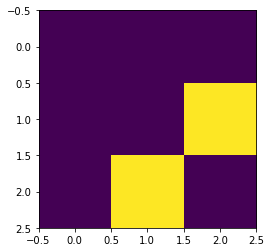

In [21]:
# Creating matrix A.
A = np.ones((25))
A[::2] = 2
A = np.reshape(A, (5,5))
A = np.uint8(A)

print("A:")
print(A)
print()

### WRITE CODE IN HERE. You can have up to 2 cells for this question, but only one is required #######

# Compute the GLCM for matrix A.
num_levels = np.amax(A)+1
result = texture.graycomatrix(A, [1], [np.pi/2], levels=num_levels)
#plt.imshow(np.matmul(np.reshape(result, (256, 256, 2))[:][:][0], np.reshape(result, (256, 256, 2))[:][:][1].T))

print('GLCM(A): \n', np.array(result[:,:,0,0]))
plt.imshow(np.array(result[:,:,0,0]))
plt.show()
# Print it out here.

######################################################################################################

**b.** Try computing the GLCM of matrix $A$ using a different offset of $\Delta i=2$ and $\Delta j=0$ as well as with an offset of $\Delta i=1$ and $\Delta j=-1$. How does it compare to your GLCM from part a?

GLCM(A) - offset of (2, 0): 
 [[0 0 0]
 [0 7 0]
 [0 0 8]]

GLCM(A) - offset of (1, -1):
 [[0 0 0]
 [0 8 0]
 [0 0 8]]


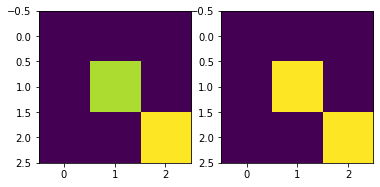

In [23]:
### WRITE CODE IN HERE. You can have up to 2 cells for this question, but only one is required #######

# Compute the GLCM for matrix A with an offset of (2, 0).
resultb1 = texture.graycomatrix(A, [2], [np.pi/2], levels=num_levels)

print('GLCM(A) - offset of (2, 0): \n', resultb1[:,:,0,0])
# Print it out here.

print()

# Compute the GLCM for matrix A with an offset of (1, -1).
resultb2 = texture.graycomatrix(A, [1], [np.pi*5/4], levels=num_levels)

print('GLCM(A) - offset of (1, -1):\n', resultb2[:,:,0,0])
# Print it out here.

fig, ax = plt.subplots(1, 2)
ax[0].imshow(resultb1[:,:,0,0])
ax[1].imshow(resultb2[:,:,0,0])

plt.show()
######################################################################################################

**Answer:** Since we're working with the same input matrix, $A$, our output GLCM is of the same dimensionality as in (a). However, since we're searching at different distances and angles as compared to (a) and so these outputs display distinctly different patterns.

**c.** Suppose you are working on a computer-aided detection algorithm for diagnosing hepatocellular carcinoma (HCC). You have written some code to perform textural analysis on several CT scans of the liver, and the first step in your processing pipeline involves computing GLCMs of various sub-sections of each CT scan to try and differentiate between healthy liver tissue and potential lesions. 

Your friend is attempting to set up a similar computer-aided detection algorithm for diagnosing HCC, except he/she is planning to do the diagnosis based on a series of ultrasound B-mode images rather than CT scans. You lend your friend your textural analysis code, but it doesn't work well at all on the ultrasound images. It has difficulty differentiating between normal tissue and abnormal findings, even in the most obvious of cases.

Why doesn't the code work well? How might you and your friend go about fixing this issue? Briefly justify your answers.

**Answer:** Image analysis is very sensitive to changes in the input data so it is not very surprising that applying code that was written for processing CT Scans to processing ustrasound B-mode images is not performing ideally. One potential cause of this is all of the noise that can be found in ultrasound images. Noisy pixel values can have a strong negative impact on image processing performance, especially in tasks that focus on the finer details of an image such as textural analysis. 
One approach to fixing this issue would be performing a more rigorous preprocessing step on all of the ultrasound images so as to reduce the noisiness, ignore irrelevant parts of an image, etc. If my hypothesis that the noisiness of ultrasound is the core issue is correct, improving performance on these images may be that simple. That said, another step that may be taken is adjusting the input parameters for texture analysis so as to focus on slightly different textures/features. Most likely a combination of these two refinements would most improve the performance of this code.

**d.** Previously, we have computed GLCMs over the entire image, which is generally not useful. Any subtle changes in lesion texture could make a significant difference in terms of the radiologist's diagnosis, but it might only result in a minimal change in the image's GLCM. A simple solution is to break the image down into chunks and compute a localized GLCM of each image chunk.

Try doing this on one of the provided mammograms. Iterate through the full mammogram and extract overlapping chunks (similar to what you would do when computing a 2D convolution), then compute the GLCM of each chunk. From each GLCM, compute your favorite Haralick texture feature and save it to a separate matrix. If you've done this correctly, you should be able to produce a textural feature map that is about the same size as your image. Plot this texture map alongside the original image. Does it look like what you expect? Why or why not?

**Tips:**
1. This could take really long ~ > 10 mins. If your code is taking too long to run, try downsampling the mammogram to a more reasonable size.
2. Don't worry too much about how the kernel behaves near the edges of the image, since these image regions are generally not as important.
3. You can choose whatever offsets you'd like when computing the GLCM. It is typical for researchers to make their textural features rotation-invariant by averaging features from multiple GLCMs computed using offsets oriented in all directions, and you can choose to do this if you want.
4. Explore different kernel sizes!

(949, 517) 255.0 0.0


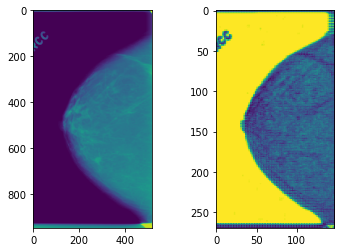

In [24]:
### WRITE CODE IN HERE. You can have up to 3 cells for this question ################################
from numpy.lib.stride_tricks import as_strided
import skimage
from skimage.measure import block_reduce

malignant_img = skimage.img_as_ubyte(plt.imread('RIGHT_CC_MALIGNANT.tif'))
malignant_img = block_reduce(malignant_img, block_size=(5, 5), func=np.mean)

print(malignant_img.shape, np.amax(malignant_img), np.amin(malignant_img))
n_levels = 256
window_dim = 10
windows = []

for i in range(len(malignant_img[:,0]) - window_dim):
    if i%7 == 0:
        newRow = []
        for j in range(len(malignant_img[0]) - window_dim):
            if j%7 == 0:
                newRow.append(np.array(malignant_img[i:i+window_dim,j:j+window_dim], dtype='uintc'))
        windows.append(newRow)

feature_img = []
i = -1
for ind, row in enumerate(windows):
    #if i%10 == 0:
        #print("completed row {}".format(i))
    i += 1
    pixelRow = np.zeros((2, int(2*len(row)+1)))
    for j, window in enumerate(row):
        window_glcm = texture.graycomatrix(window, [2], [0, np.pi/4, np.pi/2, 3*np.pi/2], levels=n_levels, normed=True)
        var = texture.graycoprops(window_glcm, prop='homogeneity')
        pixelRow[0][2*j] += var[0][0]
        pixelRow[0][2*j+1] += var[0][1]
        pixelRow[1][2*j] += var[0][2]
        pixelRow[1][2*j+1] += var[0][3]
    for p_row in pixelRow:
        feature_img.append(np.array(p_row))

fig, ax = plt.subplots(1, 2)
ax[0].imshow(malignant_img)
ax[1].imshow(feature_img)

plt.show()
######################################################################################################

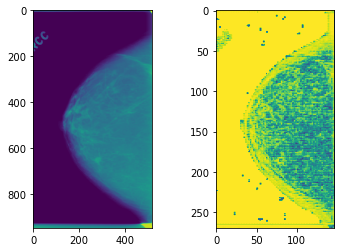

In [26]:
feature_img = []
i = -1
for ind, row in enumerate(windows):
    #if i%10 == 0:
        #print("completed row {}".format(i))
    i += 1
    pixelRow = np.zeros((2, int(2*len(row)+1)))

    for j, window in enumerate(row):
        window_glcm = texture.graycomatrix(window, [2], [0, np.pi/4, np.pi/2, 3*np.pi/2], levels=n_levels, normed=True)
        var = texture.graycoprops(window_glcm, prop='correlation')
        pixelRow[0][2*j] += var[0][0]
        pixelRow[0][2*j+1] += var[0][1]
        pixelRow[1][2*j] += var[0][2]
        pixelRow[1][2*j+1] += var[0][3]
    for p_row in pixelRow:
        feature_img.append(np.array(p_row))

fig, ax = plt.subplots(1, 2)
ax[0].imshow(malignant_img)
ax[1].imshow(feature_img)

plt.show()

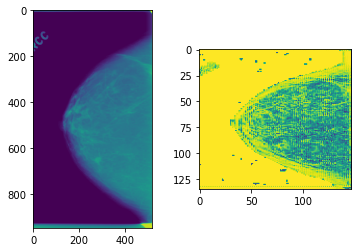

In [28]:
feature_img = []
i = -1
for ind, row in enumerate(windows):
    i += 1
    pixelRow = np.zeros(int(2*len(row)+1))
 
    for j, window in enumerate(row):
        window_glcm = texture.graycomatrix(window, [2], [0, np.pi/4, np.pi/2, 3*np.pi/2], levels=n_levels, normed=True)
        var = texture.graycoprops(window_glcm, prop='correlation')
        pixelRow[2*j] += np.mean(var[0][0:1])
        pixelRow[2*j+1] += np.mean(var[0][2:3])
    feature_img.append(np.array(pixelRow))

fig, ax = plt.subplots(1, 2)
ax[0].imshow(malignant_img)
ax[1].imshow(feature_img)

plt.show()

## Problem 4: Interpolation (10 pts)

<img src ="interp.jpg" style="max-width:100%; width: 50%">

We have an isotropic 2D pixel that is 1mm on each side. The values at each corner of the square are given by variables $A$ through $D$.  Derive the equation for the linearly interpolated value along the diagonal from $C$ to $B$ as a parametric function of $t$ where: 

$ t = 0 $ at $C$

$ t = 1 $ at $B$

$x = y = t $

For example, if this were a line containing only $A$ and $B$ where $t = 0$ at $A$ and $t = 1$ at $B$, then the linearly interpolated value along that line would be:

$f(t,A,B) = (1-x)A + Bx =  (1-t)A + Bt$

Find $ f(t,A,B,C,D) $.

**Answer:** First in terms of x and y:

$f(x,y,A,B,C,D) = C(1-x)(1-y) + Dx(1-y) + A(1-x)y + Bxy$

where $x = y = t$. Substituting $t$ for $x$ and $y$ gives: 

$f(t,A,B,C,D) = C(1-t)^2 + Dt(1-t) + A(1-t)t + Bt^2$
